In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
with open('validators.json', 'r', encoding='utf-8') as f:
    validators = json.load(f)

In [3]:
with open('frames.json', 'r', encoding='utf-8') as f:
    frames = json.load(f)

In [4]:
epochs = sorted(frames.keys(), key=int)

In [24]:
# Create a table where each column tracks the rewards of a single validator.
reward = lambda v: (v['balance'] - v['effectivebalance']) if v else 0
data = {
    i: [reward(frames[e].get(str(i))) for e in epochs]
    for i in validators.values()
}
xs = pd.DataFrame(data, index=epochs)

# Rename columns.
xs.index.rename('epoch', inplace=True)
xs.columns.rename('validator', inplace=True)

# Convert from Gwei to ETH.
xs = xs.div(1e9)

# Cut to meaningful epochs
start = xs.sum(axis=1).eq(0).sum() - 1
xs = xs.iloc[start:]

xs.to_csv('rewards.csv')

In [29]:
# Create a secondary table for analysis.
ys = pd.DataFrame({
    'active': xs.ne(0).sum(axis=1),
    'reward': xs.sum(axis=1),
})
ys['average'] = ys['reward'].div(ys['active']).fillna(0)

In [30]:
cm = 1 / 2.54  # centimeters in inches
figsize = (32*cm, 9*cm)

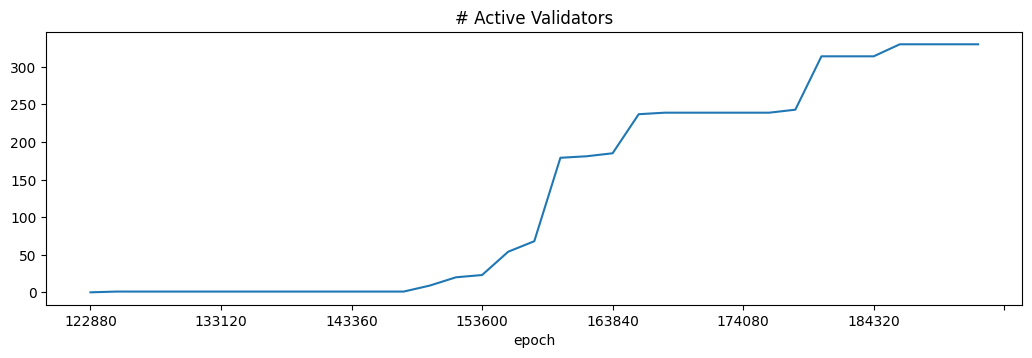

In [31]:
ys['active'].plot(figsize=figsize, title='# Active Validators');

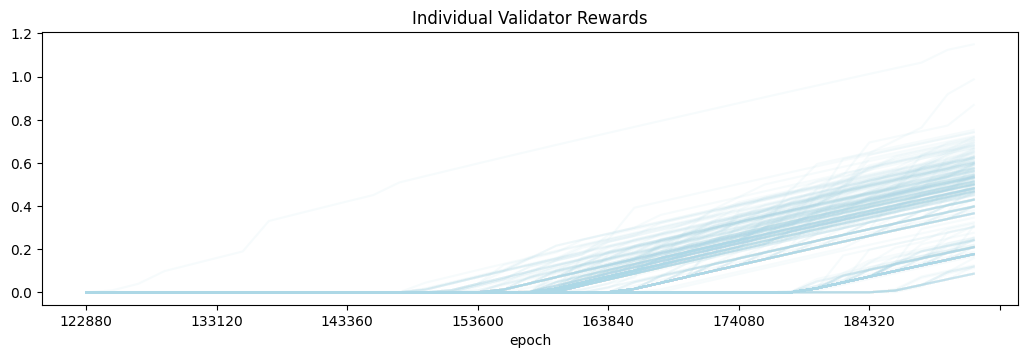

In [32]:
xs.iloc[start:].plot(figsize=figsize, title='Individual Validator Rewards', style='lightblue', legend=False, alpha=0.1);

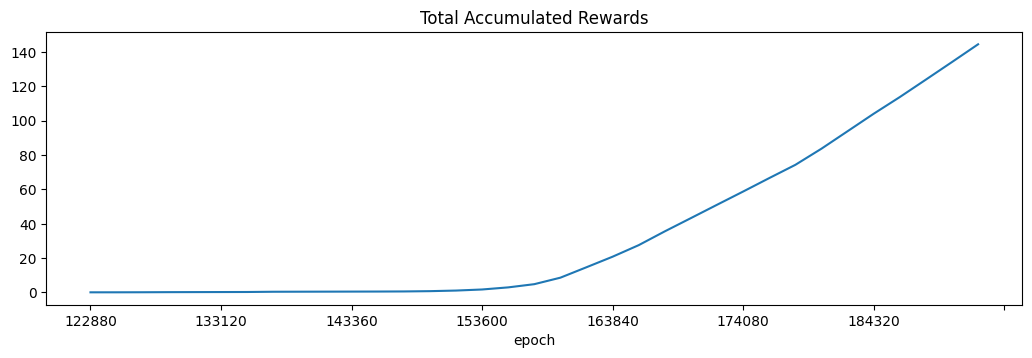

In [33]:
ys['reward'].plot(figsize=figsize, title='Total Accumulated Rewards');